# Regression

### Importing all the required libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Importing the csv file and cleaning the houses which have no price and house with 0 habitable surfece area

In [89]:
df = pd.read_csv("../data/house_details_v1.csv")
df = df[(df["Price"] != 0)&(df["Habitable surface"] != 0.0)]
df.shape

(9510, 28)

### printing first five rows

In [90]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 28)
display(df.head())

,id,Street,Housenumber,Box,Floor,City,Postalcode,Property type,Region,District,Subtype,Price,Type of sale,Construction year,Bedroom Count,Habitable surface,Kitchen type,Furnished,Fireplace,Terrace,Garden,Garden surface,Facades,SwimmingPool,Condition,EPC score,Latitude,Longitude
0,10681697,Rue Colompré,108,0,0.0,Liege,4020,RESIDENTIAL,WALLONIE,Liège,HOUSE,149000.0,residential_sale,1899.0,4.0,137.0,INSTALLED,True,False,True,0,110.0,2.0,False,GOOD,F,50.640237,5.599121
1,10676490,drève du parc,45,0,1.0,Bruxelles,1000,URBAN,BRUSSELS,Brussels,APARTMENT,330000.0,residential_sale,2025.0,2.0,91.0,USA_INSTALLED,0,False,True,0,0.0,4.0,False,AS_NEW,A,50.866596,4.344900
2,10675312,Boulevard du Triomphe,201,B42,4.0,Auderghem,1160,URBAN,BRUSSELS,Brussels,FLAT_STUDIO,255500.0,residential_sale,2022.0,0.0,46.0,USA_HYPER_EQUIPPED,False,False,True,0,0.0,0.0,False,AS_NEW,A,50.816396,4.398940
3,10681830,Rue du Vieux Chemin,37,11,1.0,Embourg,4053,0,WALLONIE,Liège,APARTMENT,399000.0,residential_sale,2010.0,3.0,145.0,INSTALLED,0,True,True,0,0.0,3.0,0,GOOD,B,50.598571,5.618877
4,10681832,Rue du Vieux Chemin,37,11,1.0,Embourg,4053,0,WALLONIE,Liège,PENTHOUSE,399000.0,residential_sale,2010.0,3.0,145.0,INSTALLED,0,True,True,0,0.0,3.0,0,GOOD,B,50.598571,5.618877


### checking the information of the columns

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9510 entries, 0 to 10795
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9510 non-null   int64  
 1   Street             9510 non-null   object 
 2   Housenumber        9510 non-null   object 
 3   Box                9510 non-null   object 
 4   Floor              9510 non-null   float64
 5   City               9510 non-null   object 
 6   Postalcode         9510 non-null   object 
 7   Property type      9510 non-null   object 
 8   Region             9510 non-null   object 
 9   District           9510 non-null   object 
 10  Subtype            9510 non-null   object 
 11  Price              9510 non-null   float64
 12  Type of sale       9510 non-null   object 
 13  Construction year  9510 non-null   float64
 14  Bedroom Count      9510 non-null   float64
 15  Habitable surface  9510 non-null   float64
 16  Kitchen type       9510 non-

In [92]:
# dropping duplicates
df = df.drop_duplicates(subset=[
 'Street',
 'Housenumber',
 'Box',
 'Floor',
 'City',
 'Postalcode',
 'Property type',
 'Region',
 'District',
 'Latitude',
 'Longitude'])
df.shape

(7914, 28)

In [93]:
# adding a new column province based on the postal code
zip_to_province = {
    range(1000, 1300): 'Brussels',
    range(1300, 1500): 'Provincie Waals-Brabant',
    range(1500, 2000): 'Provincie Vlaams-Brabant',
    range(2000, 3000): 'Provincie Antwerpen',
    range(3000, 3500): 'Provincie Vlaams-Brabant',
    range(3500, 4000): 'Provincie Limburg',
    range(4000, 5000): 'Provincie Luik',
    range(5000, 6000): 'Provincie Namen',
    range(6000, 6600): 'Provincie Henegouwen',
    range(6600, 7000): 'Provincie Luxemburg',
    range(7000, 8000): 'Provincie Henegouwen',
    range(8000, 9000): 'Provincie West-Vlaanderen',
    range(9000, 10000): 'Provincie Oost-Vlaanderen'
    }

def convert_postalcode(postalcode):
    """function to convert the postal code to integer and handel value error"""
    try:
        return int(postalcode)
    except ValueError:
        return None

# applying the above function to the column "Postal code "
df["Postalcode"] = df["Postalcode"].apply(convert_postalcode)



# Add a new column 'Province' based on the zip codes
df['Province'] = df['Postalcode'].apply(
    lambda postalcode: next((province for zip_range, province in zip_to_province.items() if postalcode in zip_range), None)
)



In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7914 entries, 0 to 10793
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7914 non-null   int64  
 1   Street             7914 non-null   object 
 2   Housenumber        7914 non-null   object 
 3   Box                7914 non-null   object 
 4   Floor              7914 non-null   float64
 5   City               7914 non-null   object 
 6   Postalcode         7896 non-null   float64
 7   Property type      7914 non-null   object 
 8   Region             7914 non-null   object 
 9   District           7914 non-null   object 
 10  Subtype            7914 non-null   object 
 11  Price              7914 non-null   float64
 12  Type of sale       7914 non-null   object 
 13  Construction year  7914 non-null   float64
 14  Bedroom Count      7914 non-null   float64
 15  Habitable surface  7914 non-null   float64
 16  Kitchen type       7914 non-

In [95]:
# name of the columns
df.columns

Index(['id', 'Street', 'Housenumber', 'Box', 'Floor', 'City', 'Postalcode',
       'Property type', 'Region', 'District', 'Subtype', 'Price',
       'Type of sale', 'Construction year', 'Bedroom Count',
       'Habitable surface', 'Kitchen type', 'Furnished', 'Fireplace',
       'Terrace', 'Garden', 'Garden surface', 'Facades', 'SwimmingPool',
       'Condition', 'EPC score', 'Latitude', 'Longitude', 'Province'],
      dtype='object')

In [96]:

# columns with the categorical values which needs to be retained
columns_to_retain = ["Price","City","Subtype","Kitchen type","Furnished","Terrace","Garden","Facades","Bedroom Count","SwimmingPool", "Habitable surface"]


In [97]:
# Subsetting the dataframe with important features
df = df[columns_to_retain]
df.head()

,Price,City,Subtype,Kitchen type,Furnished,Terrace,Garden,Facades,Bedroom Count,SwimmingPool,Habitable surface
0,149000.0,Liege,HOUSE,INSTALLED,True,True,0,2.0,4.0,False,137.0
1,330000.0,Bruxelles,APARTMENT,USA_INSTALLED,0,True,0,4.0,2.0,False,91.0
2,255500.0,Auderghem,FLAT_STUDIO,USA_HYPER_EQUIPPED,False,True,0,0.0,0.0,False,46.0
3,399000.0,Embourg,APARTMENT,INSTALLED,0,True,0,3.0,3.0,0,145.0
7,361000.0,Bruxelles,APARTMENT,HYPER_EQUIPPED,0,True,0,4.0,2.0,False,92.0


In [103]:
df.City


0                      Liege
1                  Bruxelles
2                  Auderghem
3                    Embourg
7                  Bruxelles
                ...         
10787                Herstal
10788            Kluisbergen
10791    WOLUWÉ-SAINT-PIERRE
10792               TERHAGEN
10793     MONT-SAINT-GUIBERT
Name: City, Length: 7914, dtype: object

In [99]:
# Replacing all the 0's to False in the columns and changing it to bool datatype
df['Terrace'] = df['Terrace'].replace('0', False)
df["Terrace"] = df['Terrace'].astype(bool)
df['Furnished'] = df['Furnished'].replace('0', False)
df['Furnished'] = df['Furnished'].astype(bool)
df['Garden'] = df['Garden'].replace('0', False)
df['Garden'] = df['Garden'].astype(bool)
df['SwimmingPool'] = df['SwimmingPool'].replace('0', False)
df['SwimmingPool'] = df['SwimmingPool'].astype(bool)

In [100]:
# creating matrices for dependent and independent variable
X = df.drop(columns=["Price"]).to_numpy()
y = df.Price.to_numpy().reshape(-1,1)

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)


Shape of X: (7914, 10)
Shape of y: (7914, 1)


In [101]:
# splitting train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.20)

### Trying get_dummies

In [114]:

# Create a new DataFrame with the selected columns and one-hot encode them
#categ_to_dummies =["City","Subtype","Kitchen"]
pd.get_dummies(X_train, drop_first=True)

# Step 2: Drop the original columns from X_train
#X_train = X_train.drop(X_train[categ_to_dummies])


# Step 3: Join the one-hot encoded DataFrame back with the rest of X_train
#X_train = pd.concat([X_train, dummies_df], axis=1)


ValueError: 2

#### Training the model

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
regressor = LinearRegression()

In [110]:
regressor.fit(X_train, y_train)

ValueError: could not convert string to float: 'Ixelles'

In [109]:
regressor.score(X_train, y_train)
print(regressor.coef_)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### Testing the model

In [ ]:
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_test, y_test)

0.05590525787484879

### Visualizing by plotting the data

(8357, 6)

<Axes: >

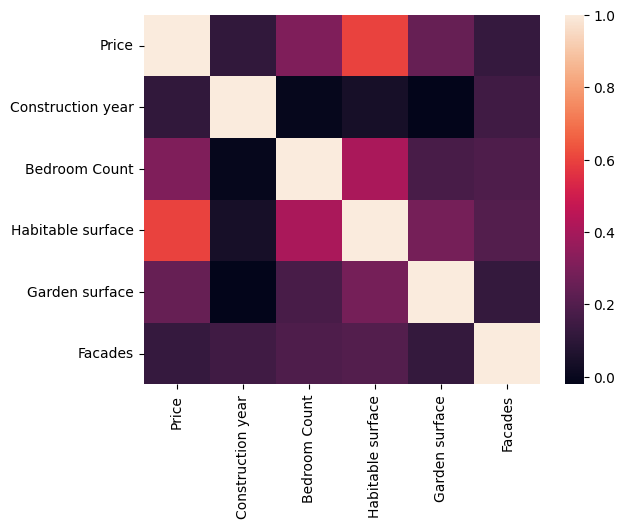

In [ ]:
# dataframe for all the numeric values and checking the correlation
df_heatmap = df[[
 'Price',
 'Construction year',
 'Bedroom Count',
 'Habitable surface',
 'Garden surface',
 'Facades'
 ]]
display(df_heatmap.shape)
corr = df_heatmap.corr()
sns.heatmap(corr)

In [ ]:
# Splitting and trining the numeric dataset 
X = df_heatmap.drop(columns=["Price"]).to_numpy()
y = df_heatmap.Price.to_numpy().reshape(-1,1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

(5599, 5)
(2758, 5)
(5599, 1)
(2758, 1)


LinearRegression()

In [ ]:
# checking the score for the training set
regressor.score(X_train, y_train)

0.42084039481987545

In [ ]:
# Testing the model 
X_test = X_test.reshape(-1, 5)
y_test = y_test.reshape(-1, 1)
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)
#print(X_test.shape)

0.2805948150989691

ValueError: x and y must be the same size

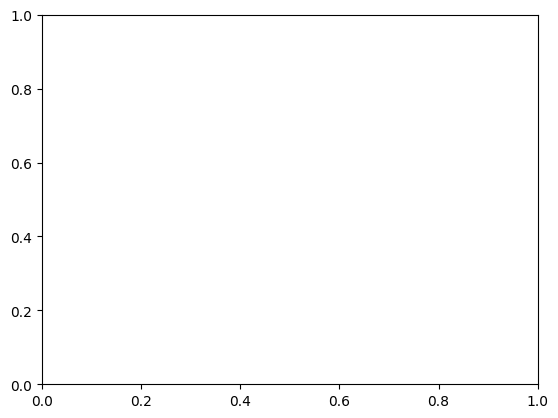

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, regressor.predict(X_train))
plt.scatter(X_train, y_train, color="red")
plt.show()